In [40]:
#import pcdl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
output_path = "../output/"

In [3]:
sbml_model = "../config/Ecoli_core.xml"

In [5]:
mcds = pcdl.TimeStep(output_path + 'output00000001.xml')

reading: ../output/PhysiCell_settings.xml
reading: ../output/output00000001.xml
working on metadata ...
working on mesh data ...
reading: ../output/initial_mesh0.mat
working on microenvironment data ...
reading: ../output/output00000001_microenvironment0.mat
parsing: oxygen data
parsing: glucose data
parsing: acetate data
parsing: CO2 data
working on discrete cell data ...
reading: ../output/output00000001_cells.mat
working on graph data ...
reading: ../output/output00000001_cell_neighbor_graph.txt
reading: ../output/output00000001_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing ../output/states_00000001.csv.
done!


In [6]:
mcdsts = pcdl.TimeSeries(output_path)

reading: ../output/PhysiCell_settings.xml
reading: ../output/output00000000.xml
working on metadata ...
working on mesh data ...
reading: ../output/initial_mesh0.mat
working on microenvironment data ...
reading: ../output/output00000000_microenvironment0.mat
parsing: oxygen data
parsing: glucose data
parsing: acetate data
parsing: CO2 data
working on discrete cell data ...
reading: ../output/output00000000_cells.mat
working on graph data ...
reading: ../output/output00000000_cell_neighbor_graph.txt
reading: ../output/output00000000_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing ../output/states_00000000.csv.
done!

reading: ../output/PhysiCell_settings.xml
reading: ../output/output00000001.xml
working on metadata ...
working on mesh data ...
reading: ../output/initial_mesh0.mat
working on microenvironment data ...
reading: ../output/output00000001_microenvironment0.mat
parsing: oxygen data
parsing: glucose data
parsing: acetat

px figure size set to [220, 22].


/home/mruscone/miniforge3/envs/studio/lib/python3.12/site-packages/pcdl/pyMCDS.py:572: RuntimeWarning: invalid value encountered in scalar divide
  dm = (tr_m_range[1] - tr_m_range[0]) / (ar_m_axis.shape[0] - 1)
/home/mruscone/miniforge3/envs/studio/lib/python3.12/site-packages/pcdl/pyMCDS.py:573: RuntimeWarning: invalid value encountered in scalar divide
  dn = (tr_n_range[1] - tr_n_range[0]) / (ar_n_axis.shape[0] - 1)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer: Error while type casting for column 'voxel_i'

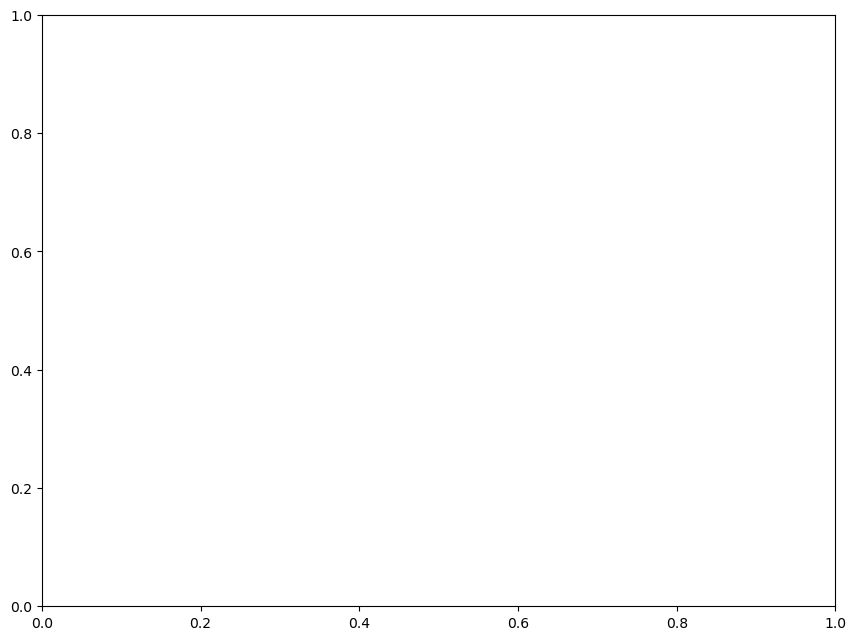

In [7]:
# generate canvas
fig, ax = plt.subplots(figsize=(10.24, 7.68))

# plot substrate
mcds.plot_contour('oxygen', cmap='Blues', ax=ax)

# plot cell agents
mcds.plot_scatter(cmap='turbo', ax=ax)

# fine-tuning
ax.axis('equal')  # this is essential, to overlay the coordinates properly!
fig.suptitle('cell agents and substrate')
plt.tight_layout()

# save to file
fig.savefig(f'my_plot.png', facecolor='white')
#plt.close()

# display on screen
fig.show()# load libraries
import matplotlib.pyplot as plt

# generate canvas
fig, ax = plt.subplots(figsize=(10.24, 7.68))

# plot substrate
mcds.plot_contour('oxygen', cmap='Blues', ax=ax)

# plot cell agents
mcds.plot_scatter(cmap='turbo', ax=ax)

# fine-tuning
ax.axis('equal')  # this is essential, to overlay the coordinates properly!
fig.suptitle('cell agents and substrate')
plt.tight_layout()

# save to file
fig.savefig(f'my_plot.png', facecolor='white')
#plt.close()

In [ ]:
mcdsts.plot_timeseries("cell_type", "growth_rate")

In [ ]:
mcdsts.plot_timeseries("cell_type", "oxygen")

In [ ]:
mcdsts.plot_timeseries("cell_type", "glucose")

In [ ]:
mcdsts.plot_timeseries("cell_type", "acetate")

In [ ]:
mcdsts.plot_timeseries("cell_type", "CO2")

In [10]:
from scipy.io import loadmat

In [11]:
m0 = loadmat("../output/initial_microenvironment0.mat")['multiscale_microenvironment'][4:]
print(m0.T[0])

[10.   5.5  0.   0. ]


In [4]:
double substrate_conc = density_vector[ex_strut.density_index];
// scaling Vmax ased on cell volume
double Vmax = ex_strut.Vmax.value;
double Km   = ex_strut.Km.value;

// using irreversible Michaelis Menten kinetics to estimate the flux bound; should be calculated from density
double uptake_rate = (Vmax * substrate_conc) / (Km + substrate_conc); //  mmol / gDWcell / hours


// Here we are simulating what is going to happen in BioFVM after we plug the Net Export Rate (we will rescale it later)

// max_rate = mmol/g DW cell/hours
double total_uptake = uptake_rate * dt / hours_to_minutes; // mmol/g DW cell

// (picograms to grams conversion) 
total_uptake *= mass_scaling; // mmol

// correct scaling that takes into account the volume units (um³) in BioFVM
// we are getting the total substrate of the voxel
double total_substrate = substrate_conc * dV * 1e-15; // mmol
// check if the we are taking more than what is stored in the voxel
if((total_uptake * 1e12) > (total_substrate * 1e12)){
    uptake_rate = total_substrate / mass_scaling; // mmol/gDW
    uptake_rate /= (dt * hours_to_minutes); // mmol/gDW/hours
}

// Change sign to use as lower bound of the exchange flux
double exchange_flux_lb = -1 * uptake_rate;
//std::cout << "Substrate: " << substrate_name << " concentration: " << substrate_conc << " Vmax: " << Vmax << " Km: " << Km << " Max rate: " << max_rate << " Exchange flux lb: " << exchange_flux_lb << std::endl;
// Updateing the lower bound of the corresponding exchange flux
this->sbml_model.setReactionLowerBound(ex_strut.fba_flux_id, exchange_flux_lb);





 double growth_rate = this->current_growth_rate * hours_to_minutes; // growth_rate 1/h -> 1/min
growth_rate = 0.0;

// V(t+dt) = V(t) + V(t) * mu * dt = V(t) * (1 + u * dt) 
double volume_increase_ratio = 1.0 + (growth_rate * dt);
phenotype.volume.multiply_by_ratio( volume_increase_ratio );
//std::cout << "Volume: " << phenotype.volume.total << std::endl;
pCell->set_total_volume( phenotype.volume.total );
phenotype.geometry.update(pCell, phenotype, dt);

double solid_fraction = 1.0 - phenotype.volume.fluid_fraction;     
// um³ = um³
double solid_volume = phenotype.volume.total * solid_fraction;   
// volume.total (um³ = fL) * cell_density (g/mL) = pico grams (g 10^-12)
double cell_dry_weight = solid_volume * this->cell_density ;  
// re-scaling from pico grams to grams
cell_dry_weight *= 1e-12; // pg * 10^-12 = g

std::vector<double> density_vector = pCell->nearest_density_vector(); 

double dV = microenvironment.voxels(pCell->get_current_voxel_index()).volume;

// STEPS 4-5 - Update net_export_rates for the different densities
map<std::string, ExchangeFluxData>::iterator it;
for(it = this->substrate_exchanges.begin(); it != this->substrate_exchanges.end(); it++)
{
    // Retrive the exchange flux and its corresponding density
    std::string substrate_name = it->first;
    ExchangeFluxData ex_strut = it->second;
    
    int density_index = ex_strut.density_index;
    std::string fba_flux_id = ex_strut.fba_flux_id;
    
    dFBAReaction* exchange_flux = this->sbml_model.getReaction(fba_flux_id);
    double flux_value =  exchange_flux->getFluxValue(); // mmol/gDW/h

    // Rescaling FBA exchanges flux into net_export_rates
    // Net export rates are expressed in substance/time
    // flux_value: mmol/gDW/h --> mmol/min
    // net_export_rate (mmol/min) = flux_value / 60 * cell_dry_weight  = mmol/min
    double net_export_rate = flux_value * cell_dry_weight / hours_to_minutes; // mmol/min
    //TODO to adapt to voxel size!
    
    double substrate_conc = density_vector[ex_strut.density_index]; // mM = mmol/L

    // correct scaling that takes into account the volume units (um³) in BioFVM
    double total_substrate = substrate_conc * (dV / 1e15); // mmol

    double substrate_consumption = net_export_rate * dt * -1;

    if(substrate_consumption > total_substrate){
        std::cout << "**** CellID" << pCell->ID << " Substrate: " << substrate_name << " concentration: " << substrate_conc << " Total substrate: " << total_substrate << " Consumption: " << substrate_consumption << " Net export rate: " << net_export_rate << std::endl;
    }

    std::cout << "CellID" << pCell->ID << " Substrate: " << substrate_name << " concentration: " << substrate_conc << " Total substrate: " << total_substrate << " Consumption: " << substrate_consumption << " Net export rate: " << net_export_rate << std::endl;

    // correct scaling that takes into account the volume units (liter to um³) in BioFVM 
    net_export_rate *= 1e15; // BioFVM units are in mM  =  mmol / L whereas dV is in um³ = 1e-15 L

    phenotype.secretion.net_export_rates[density_index] = net_export_rate;
    if (default_microenvironment_options.track_internalized_substrates_in_each_agent)
    {
        phenotype.molecular.internalized_total_substrates[density_index] = 0;
    }

SyntaxError: invalid character '³' (U+00B3) (836569511.py, line 18)

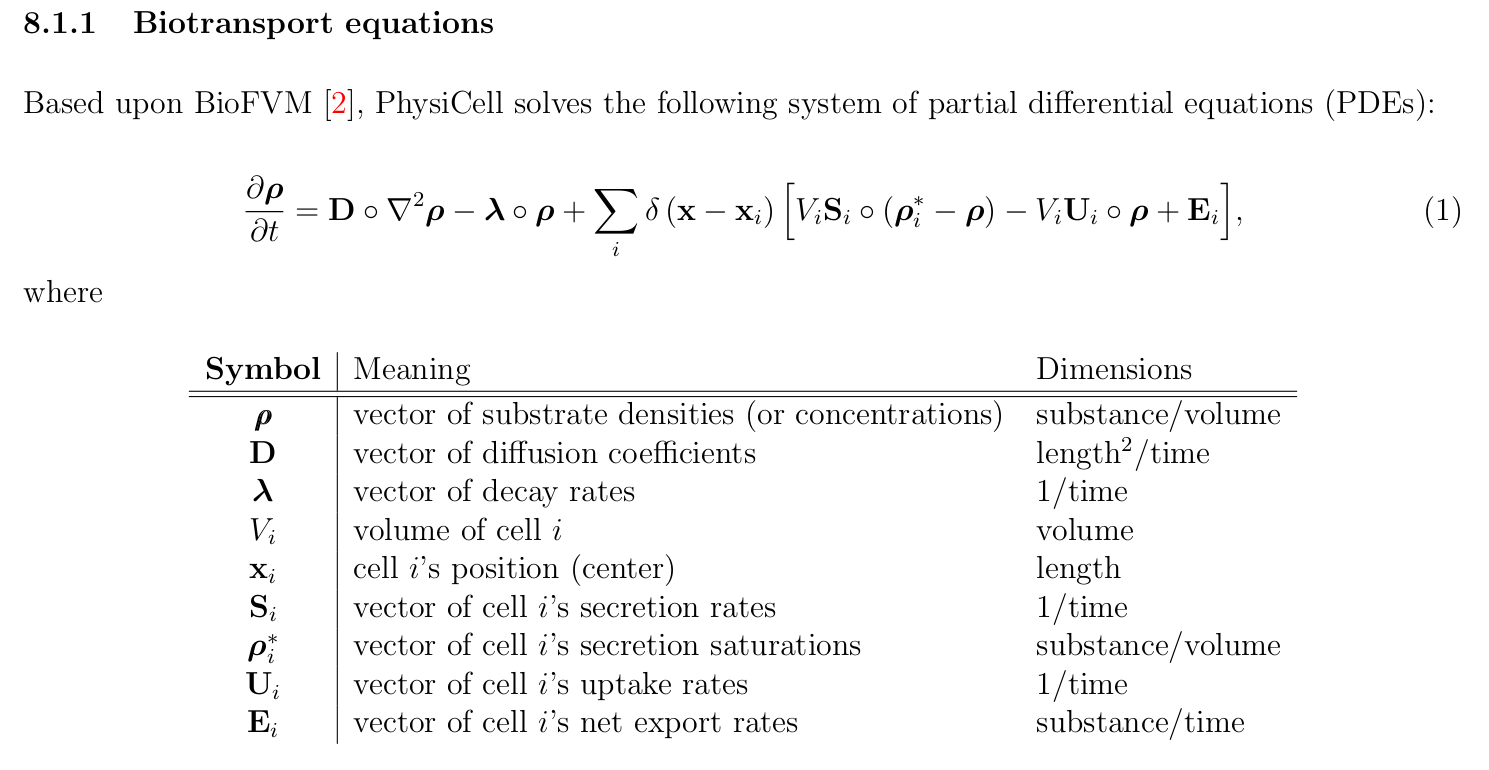

In [4]:
import cobra
from cobra.io import read_sbml_model

model = read_sbml_model("../config/Ecoli_core.xml")

Restricted license - for non-production use only - expires 2025-11-24


In [55]:
def set_bounds(model, conc_dict,  eps=1e-18):
    for k in conc_dict:
        stru = conc_dict[k]
        Vmax = stru["Vmax"]
        Km = stru["Km"]
        conc = stru["conc"]
        r_id = stru["EX"]

        conc = max(conc, 0)
        uptake_rate = (Vmax * conc) / (Km + conc) #  mmol / gDW cell / hours
    
        total_uptake = uptake_rate * (dt * hours_to_minutes) # mmol/g DW cell    
        total_uptake = total_uptake * mass_scaling # mmol
    
        total_substrate = conc * dV * 1e-15 # mmol
    
        if (total_substrate - total_uptake) < eps:
            uptake_rate = total_substrate / (dt * hours_to_minutes) # mmol/ hour
            uptake_rate = uptake_rate / mass_scaling # moll / g DW cell / hour
            
        reaction = model.reactions.get_by_id(r_id)
        lower_bound = -1 * uptake_rate
        print(k, lower_bound)
        reaction.lower_bound = lower_bound
    
    return model        


def simulate_fba(stru, model, eps=1e-18):
    r_id = stru["EX"]
    Vmax = stru["Vmax"] # mmol/ gDW cell / hour
    Km = stru["Km"] # mM
    conc = stru["conc"] # mM

    conc = max(conc, 0)
    uptake_rate = (Vmax * conc) / (Km + conc) #  mmol / gDW cell / hours

    total_uptake = uptake_rate * (dt * hours_to_minutes) # mmol/g DW cell    
    total_uptake = total_uptake * mass_scaling # mmol

    total_substrate = conc * dV * 1e-15 # mmol

    if (total_substrate - total_uptake) < eps:
        uptake_rate = total_substrate / (dt * hours_to_minutes) # mmol/ hour
        uptake_rate = uptake_rate / mass_scaling # moll / g DW cell / hour
        
    reaction = model.reactions.get_by_id(r_id)
    reaction.lower_bound = -1 * uptake_rate
    solution = model.optimize()
    flux_value = solution.fluxes[r_id] #  mmol / gDWcell / hours
    net_export_rate = flux_value * mass_scaling * hours_to_minutes # mmol / min
    
    return (flux_value, net_export_rate) 

In [49]:
cell_volume = 2494 
solid_volume = cell_volume * 0.25
cell_density = 1.04
hours_to_minutes = 1/60

dt = 0.01
dV = 8000

cell_dry_weight = solid_volume * cell_density
mass_scaling = cell_dry_weight * 1e-12

Reaction identifier,Biomass_Ecoli_core
Name,Biomass Objective Function with GAM
Memory address,0x7235181ce440
Stoichiometry,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c... 1.496 3-Phospho-D-glycerate + 3.7478 Acetyl-CoA + 59.81 ATP + 0.361 D-Erythrose 4-phosphate + 0.0709 D-Fructose 6-phosphate + 0.129 Glyceraldehyde 3-phosphate + 0.205 D-Glucose 6-phosphate + 0.2557...
GPR,
Lower bound,0.0
Upper bound,1000.0


In [69]:
biomass = [r for r in model.reactions if r.objective_coefficient != 0][0]


conc_dict = {}
conc_dict["O2"] = {"Vmax": 8, "Km": 0.002, "conc": 10, "EX": "EX_o2_e"}
conc_dict["Glc"] = {"Vmax": 5, "Km": 0.02, "conc": 5.5, "EX": "EX_glc__D_e"}

model = read_sbml_model("../config/Ecoli_core.xml")
model = set_bounds(model, conc_dict)

solution = model.optimize()
model.summary()

O2 -7.998400319936012
Glc -4.981884057971015


Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,4.982,6,100.00%
nh4_e,EX_nh4_e,1.782,0,0.00%
o2_e,EX_o2_e,7.998,0,0.00%
pi_e,EX_pi_e,1.202,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_e,-3.806,2,47.61%
co2_e,EX_co2_e,-8.376,1,52.39%
h2o_e,EX_h2o_e,-10.76,0,0.00%
h_e,EX_h_e,-10.36,0,0.00%


In [76]:
steps = 100
glucose = np.zeros(steps)
glucose[0] = 5.5

glc_stru = conc_dict["Glc"]

for i in range(1, steps):
    glc_stru["conc"] = glucose[i-1]
    flux_value, net_export_rate = simulate_fba(glc_stru, model)

    # simulate BioFVM
    tmp_solver = net_export_rate * dt
    tmp_solver = tmp_solver / dV * 1e15
    glucose[i] = glucose[i-1] + tmp_solver

    #print(net_export_rate, flux_value, tmp_solver)
    print(glucose[i])

5.43269889794686
5.365400816541875
5.298105831142184
5.2308140199568784
5.1635254641926105
5.096240248208608
5.028958459681838
4.961680189783112
4.8944055333650365
4.827134589162748
4.7598674600085165
4.6926042530613685
4.625345080053012
4.558090057551465
4.490839307243953
4.42359295624077
4.356351137402007
4.28911398968924
4.2218816585445005
4.154654296299097
4.087432062615168
4.020215124963144
3.9530036591386892
3.8857978498230934
3.8185978911915774
3.7514039875744998
3.6842163541770834
3.617035217863983
3.549860818015822
3.4826934074657663
3.4155332535252647
3.3483806391093385
3.2812358639732238
3.2140992460738462
3.1469711230715447
3.0798518539897213
3.012741821052761
2.9456414317256696
2.8785511209825643
2.8114713538355014
2.7444026281602896
2.677345477862092
2.610300476430995
2.543268240946566
2.4762494366011034
2.4092447818242313
2.34225505410725
2.2752810966449486
2.208323825936316
2.1413842405149524
2.074463431016504
2.007562591836165
1.940683034686909
1.8738262044421765
1.806

In [24]:
#growth_rate = solution.objective_value

solution = model.optimize()

for k in conc_dict:
    stru = conc_dict[k]
    Vmax = stru["Vmax"]
    Km = stru["Km"]
    conc = stru["conc"]
    r_id = stru["EX"]

    flux_value = solution.fluxes[r_id]
    print(f"FBA exchange {k}: {flux_value}") 


    net_export_rate = flux_value * mass_scaling * hours_to_minutes  # here there was twice cell_dry_weight, once explicit and once in mass scaling
    
    substrate_conc = conc

    total_substrate = substrate_conc * (dV / 1e15)

    substrate_consumption = -1 * net_export_rate * dt 
    print(f"Total {k}: {total_substrate/(dV/ 1e15)}")
    print(f"Total Uptake {k}: {substrate_consumption}")
    print(f"Final amount of {k}: {(total_substrate - substrate_consumption)/(dV/ 1e15)}")  # is this correct?
    print()

FBA exchange O2: -7.986016963398502
Total O2: 1.14224359
Total Uptake O2: 3.4606073508060173e-13
Final amount of O2: 1.098985998114925

FBA exchange Glc: -3.493990192562932
Total Glc: 0.04640063
Total Uptake Glc: 1.5140624167772706e-13
Final amount of Glc: 0.027474849790284115



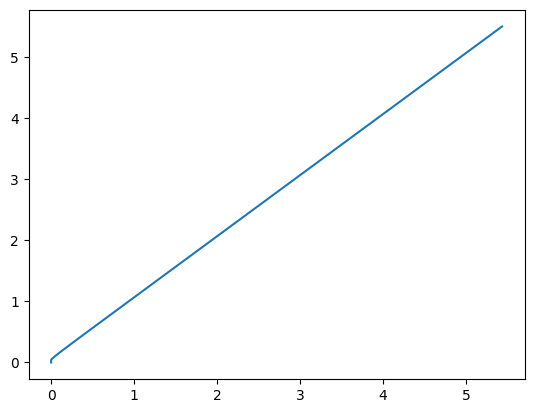

In [83]:
biofvm_glc = []
for i in range(0, 100):
    m0 = loadmat(f"../output/output000000{i:02d}_microenvironment0.mat")['multiscale_microenvironment'][4:]
    x = m0.T[0][1]
    biofvm_glc.append(x)

len(biofvm_glc)

plt.plot(biofvm_glc[3:], glucose[:-3])

In [73]:
m0 = loadmat("../output/output00000001_microenvironment0.mat")['multiscale_microenvironment'][4:]
print(m0.T[0])

[10.   5.5  0.   0. ]


In [74]:
m0 = loadmat("../output/output00000002_microenvironment0.mat")['multiscale_microenvironment'][4:]
print(m0.T[0])

[10.   5.5  0.   0. ]


In [79]:
m0 = loadmat("../output/output00000003_microenvironment0.mat")['multiscale_microenvironment'][4:]
print(m0.T[0])

[9.89194828 5.4326989  0.05140953 0.11315456]


In [80]:
m0 = loadmat("../output/output00000004_microenvironment0.mat")['multiscale_microenvironment'][4:]
print(m0.T[0])

[9.78389679 5.36540082 0.10281326 0.22630872]


In [81]:
m0 = loadmat("../output/output00000084_microenvironment0.mat")['multiscale_microenvironment'][4:]
print(m0.T[0])

[1.14224359 0.04640063 4.08811034 9.27266816]


In [82]:
m0 = loadmat("../output/output00000085_microenvironment0.mat")['multiscale_microenvironment'][4:]
print(m0.T[0])

[ 1.03435915e+00 -6.93889390e-18  4.09795780e+00  9.38454166e+00]


In [83]:
m0 = loadmat("../output/output00000086_microenvironment0.mat")['multiscale_microenvironment'][4:]
print(m0.T[0])

[ 1.03435915e+00 -6.93889390e-18  4.09795780e+00  9.38454166e+00]


In [ ]:
model 